## 05 衡量回归算法的标准，MSE vs MAE

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

### 波士顿房产数据

In [5]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [24]:
print(data.shape)

(506, 13)


In [25]:
boston = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
print(boston.shape)

(506, 14)


In [26]:
# 数据准备
X = data
y = target

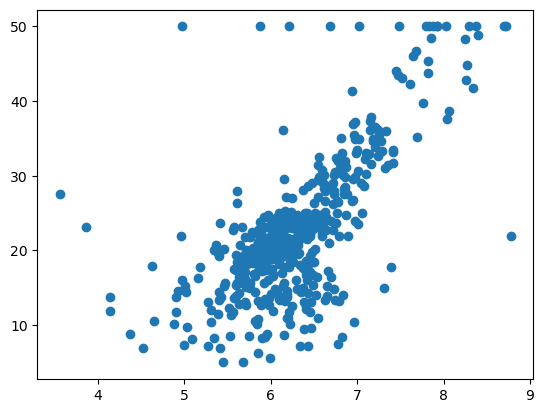

In [27]:
#加载波士顿房产数据
x = data[:,5]#下标从1开始，选取第五列数据，只使用房间数量这个特征,现在获取到的数据是1行
plt.scatter(x, y)
plt.show()

In [28]:
# 去掉不合理数据
x = x[y < 50.0]
y = y[y < 50.0]

In [29]:
x.shape, y.shape

((490,), (490,))

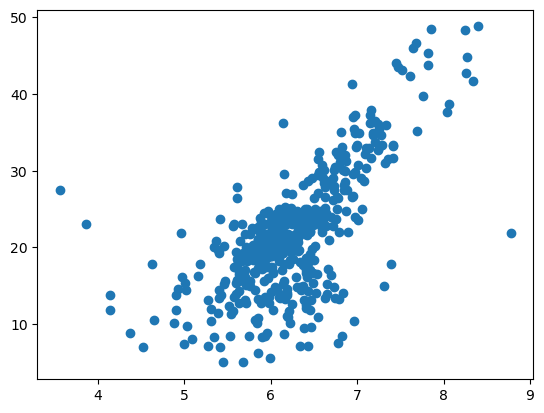

In [30]:
plt.scatter(x, y)
plt.show()

### 使用简单线性回归法

In [31]:
from playML.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [34]:
x_train.shape, y_train.shape

((392,), (392,))

In [36]:
x_test.shape, y_test.shape

((98,), (98,))

In [37]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [38]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [39]:
reg.a_

7.8608543562689555

In [40]:
reg.b_

-27.459342806705543

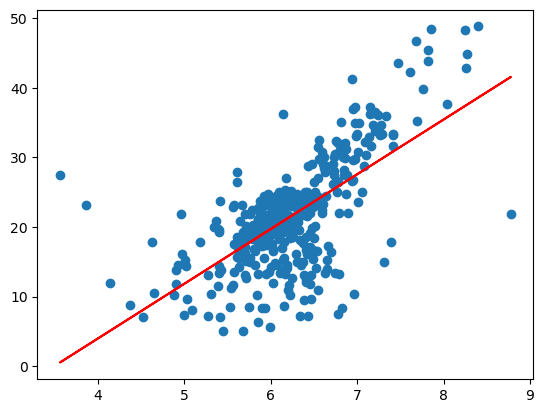

In [41]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

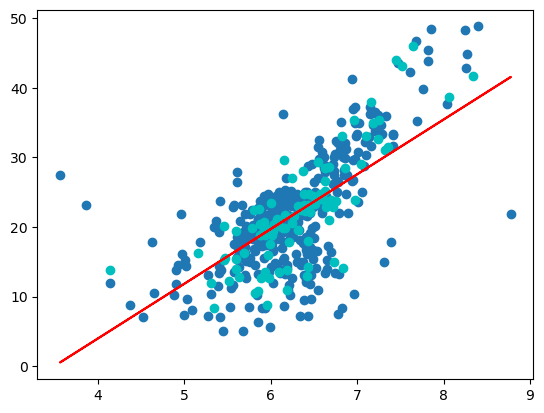

In [42]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="c")
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [43]:
y_predict = reg.predict(x_test)

### MSE

In [44]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

24.156602134387438

### RMSE

In [45]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

### MAE

In [46]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test

3.5430974409463873

### 封装我们自己的评测函数

代码参见 [这里](playML/metrics.py)

In [47]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [48]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [49]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [50]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### scikit-learn中的MSE和MAE

In [51]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [52]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [53]:
mean_absolute_error(y_test, y_predict)

3.5430974409463873

### MSE v.s. MAE